# Vertebral Column Data Set

#### This Biomedical data set was built by Dr. Henrique da Mota during a medical residence period in Lyon, France. Each patient in the data set is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0 and AB=1.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    recall_score, 
    precision_score, 
    f1_score
)
from tabulate import tabulate


## (a) Download the Vertebral Column Data Set from: https://archive.ics.uci. edu/ml/datasets/Vertebral+Column.

In [5]:
arff_file = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(arff_file[0])

In [6]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [7]:
df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,b'Normal'


### (b) Pre-Processing and Exploratory data analysis:

In [9]:
df['class'] = df['class'].map({b'Abnormal':1, b'Normal':0})
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


## (b) i. Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

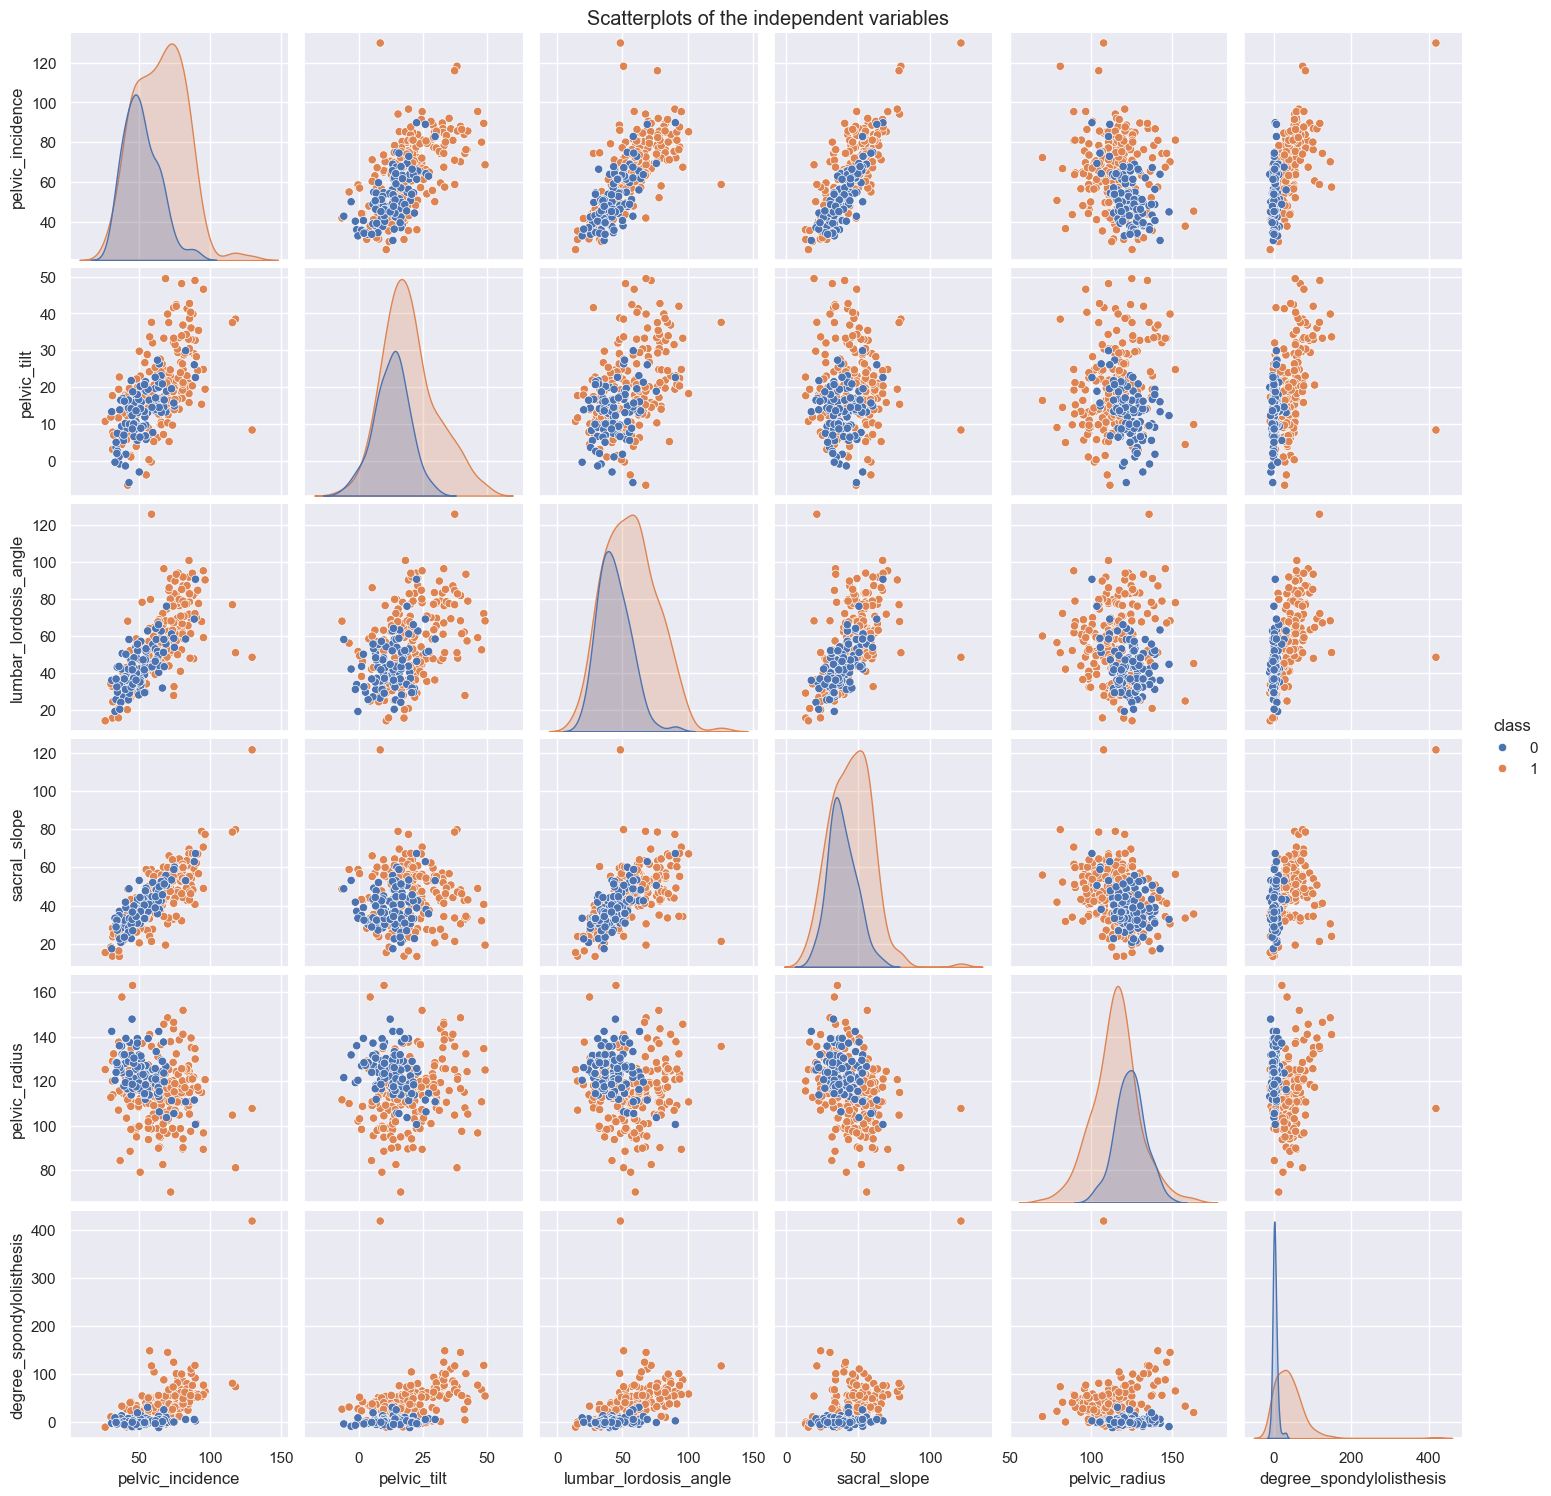

In [11]:
sns.set_theme(style="darkgrid")
scatterplots = sns.pairplot(data=df,hue='class')
scatterplots.fig.suptitle("Scatterplots of the independent variables", y=1)
plt.show()

### (b) ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

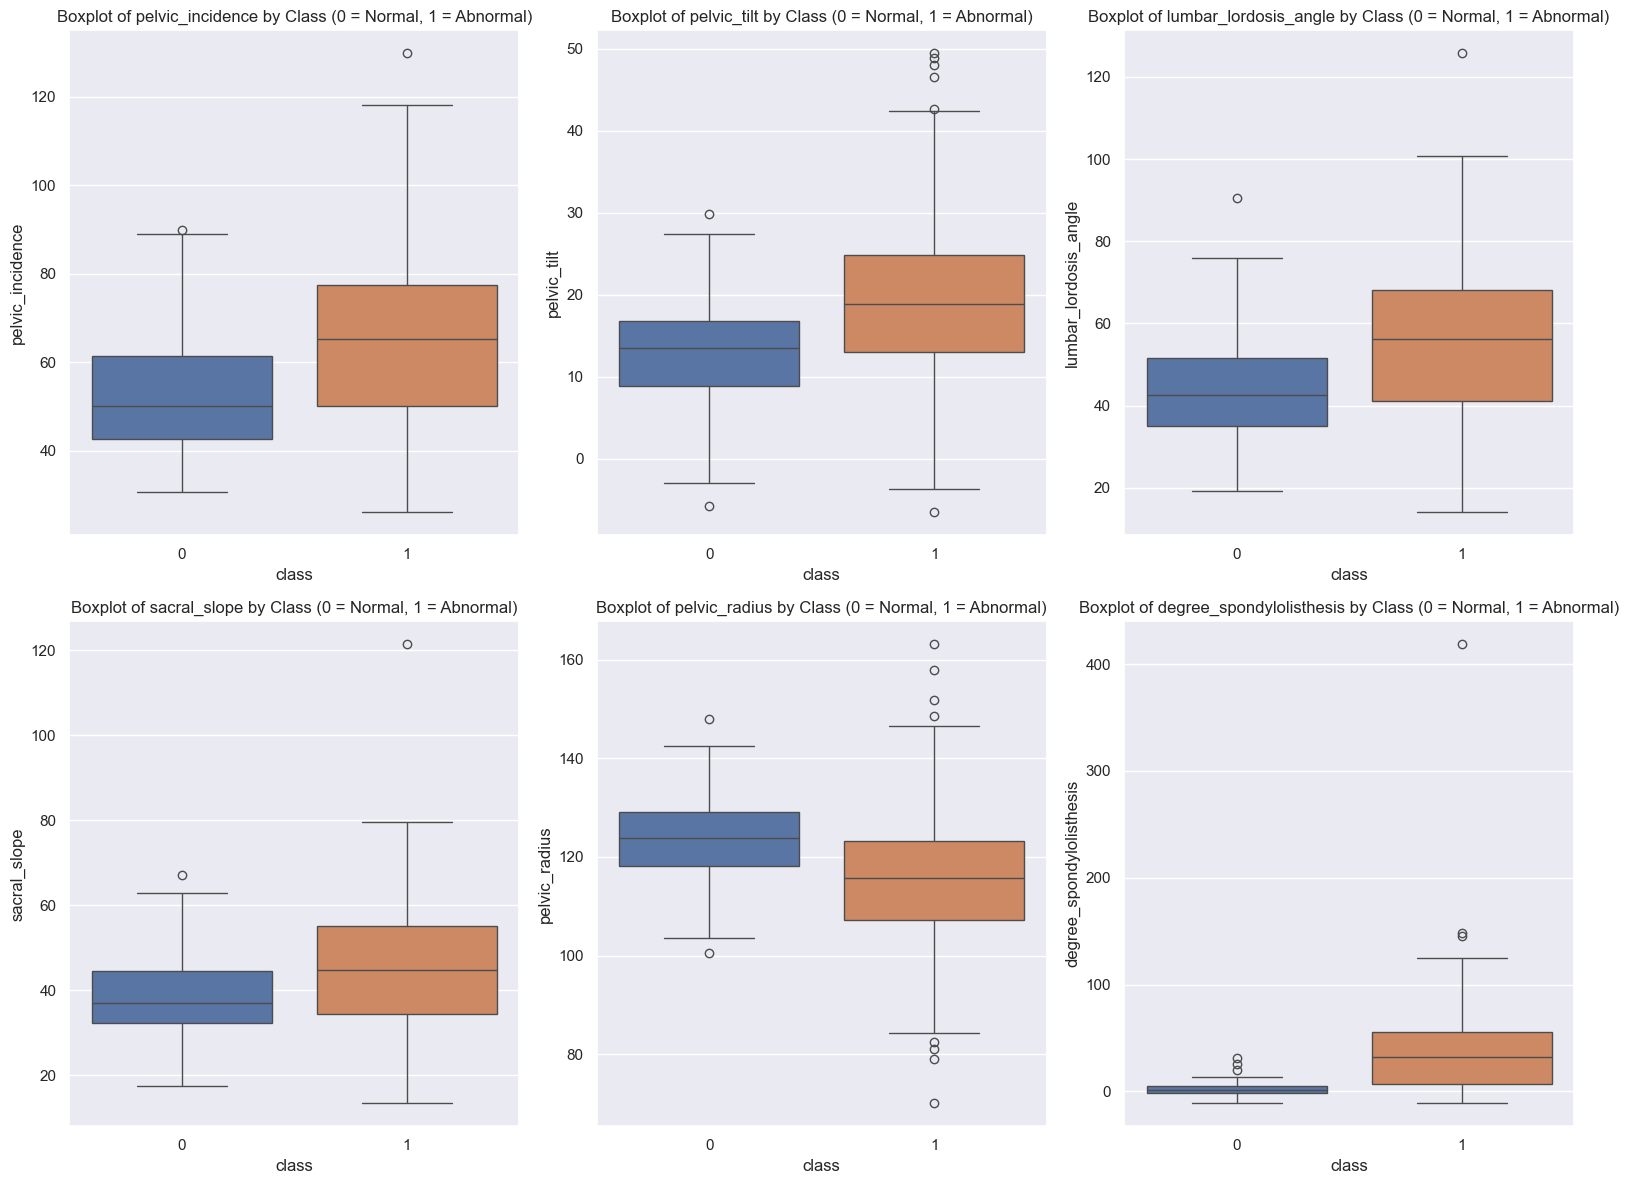

In [13]:
independent_variables = df.columns[:-1]
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i,var in enumerate(independent_variables):
     sns.boxplot(x='class', y=var, data=df, hue='class', ax=axes[i], legend=False)
     axes[i].set_title(f'Boxplot of {var} by Class (0 = Normal, 1 = Abnormal)')

plt.tight_layout()
plt.show()

### (b) iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [15]:
class0 = df[df['class'] == 0]
class1 = df[df['class'] == 1]

train_class0 = class0.head(70)
train_class1 = class1.head(140)
train_set_df = pd.concat([train_class0, train_class1])

test_class0 = class0.iloc[70:]
test_class1 = class1.iloc[140:]
test_set_df = pd.concat([test_class0, test_class1])

X_train = train_set_df.drop(columns=['class'])
y_train = train_set_df['class']

X_test = test_set_df.drop(columns=['class'])
y_test = test_set_df['class']

In [16]:
from tabulate import tabulate

data = [
    ["X_train", X_train.shape],
    ["y_train", y_train.shape],
    ["X_test", X_test.shape],
    ["y_test", y_test.shape]
]
headers = ['Datasets', 'Shape']
print(tabulate(data, headers = headers, tablefmt="fancy_grid"))

╒════════════╤══════════╕
│ Datasets   │ Shape    │
╞════════════╪══════════╡
│ X_train    │ (210, 6) │
├────────────┼──────────┤
│ y_train    │ (210,)   │
├────────────┼──────────┤
│ X_test     │ (100, 6) │
├────────────┼──────────┤
│ y_test     │ (100,)   │
╘════════════╧══════════╛


## (c) Classification using KNN on Vertebral Column Data Set

### (c) i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).


KNN Classification Results:
Accuracy: 0.9

Confusion Matrix:
[[20 10]
 [ 0 70]]


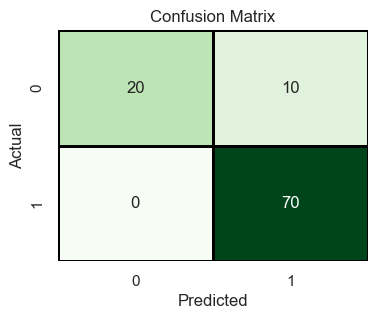


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        30
           1       0.88      1.00      0.93        70

    accuracy                           0.90       100
   macro avg       0.94      0.83      0.87       100
weighted avg       0.91      0.90      0.89       100



In [19]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("KNN Classification Results:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', linewidths=1.0, linecolor='black', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("\nClassification Report:")
print(report)

### (c) ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller increments of k. Which k∗ is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F1-score when k = k∗.

Optimal k (k*): 4

Performance Metrics for k*:
Accuracy for k=4: 0.9400
Confusion Matrix:
[[25  5]
 [ 1 69]]
True Positive Rate (Sensitivity/Recall): 0.9857
True Negative Rate (Specificity): 0.8333
Precision: 0.9324
F1-score: 0.9583


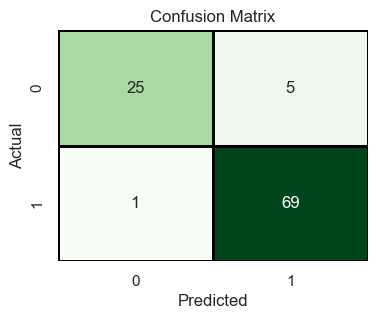

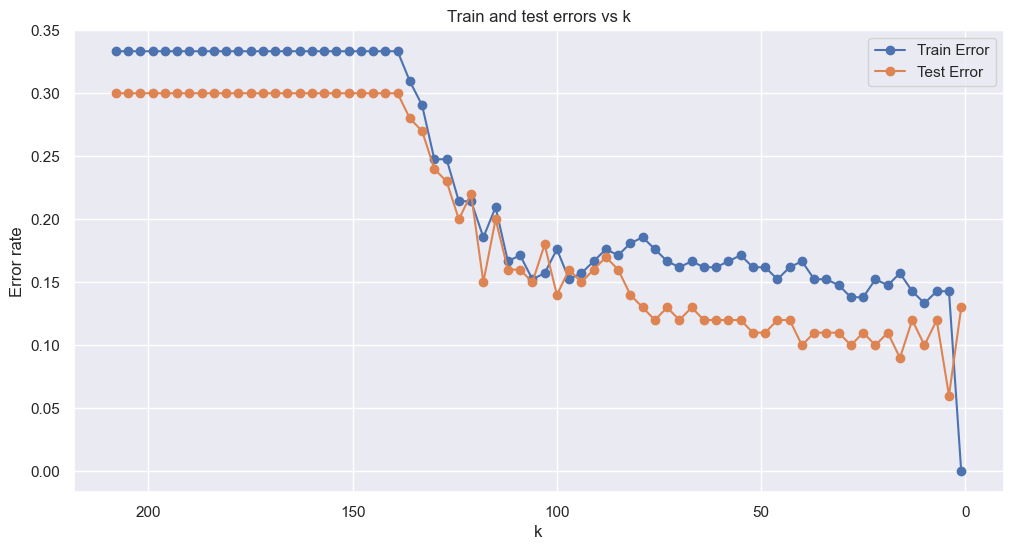

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



In [21]:
k_values = list(range(208, 0, -3))

train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_error = 1 - accuracy_score(y_train, train_pred)
    test_error = 1 - accuracy_score(y_test, test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

#Optimal k
best_k_euclidean = k_values[np.argmin(test_errors)]
print(f"Optimal k (k*): {best_k_euclidean}")
best_test_error_euclidean = min(test_errors)

#KNN with optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')
knn_optimal.fit(X_train, y_train)
y_pred_best = knn_optimal.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)
accuracy_optimal_k = accuracy_score(y_test, y_pred_best)
true_positive_rate = recall_score(y_test, y_pred_best)
true_negative_rate = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
precision = precision_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
report_best_k = classification_report(y_test, y_pred_best)

print("\nPerformance Metrics for k*:")
print(f"Accuracy for k={best_k_euclidean}: {accuracy_optimal_k:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positive Rate (Sensitivity/Recall): {true_positive_rate:.4f}")
print(f"True Negative Rate (Specificity): {true_negative_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', linewidths=1.0, linecolor='black', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(k_values, train_errors, label='Train Error', marker='o')
plt.plot(k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Train and test errors vs k')
plt.legend()
plt.gca().invert_xaxis()
plt.show()
print("Classification Report:")
print(report_best_k)

### (c) iii. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate,3 which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10,20,30,...,210}.4 Note: for each N, select your training set by choosing the first ⌊N/3⌋ rows of Class 0 and the first N − ⌊N/3⌋ rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1,6,11,...,196}. This plot is called a Learning Curve.


╒═════════════════════╤═════════════╤═══════════════════╕
│   Training Size (N) │   Optimal k │   Best Test Error │
╞═════════════════════╪═════════════╪═══════════════════╡
│                  10 │           1 │              0.25 │
├─────────────────────┼─────────────┼───────────────────┤
│                  20 │           6 │              0.2  │
├─────────────────────┼─────────────┼───────────────────┤
│                  30 │           1 │              0.22 │
├─────────────────────┼─────────────┼───────────────────┤
│                  40 │          11 │              0.25 │
├─────────────────────┼─────────────┼───────────────────┤
│                  50 │          26 │              0.3  │
├─────────────────────┼─────────────┼───────────────────┤
│                  60 │          21 │              0.29 │
├─────────────────────┼─────────────┼───────────────────┤
│                  70 │          26 │              0.29 │
├─────────────────────┼─────────────┼───────────────────┤
│             

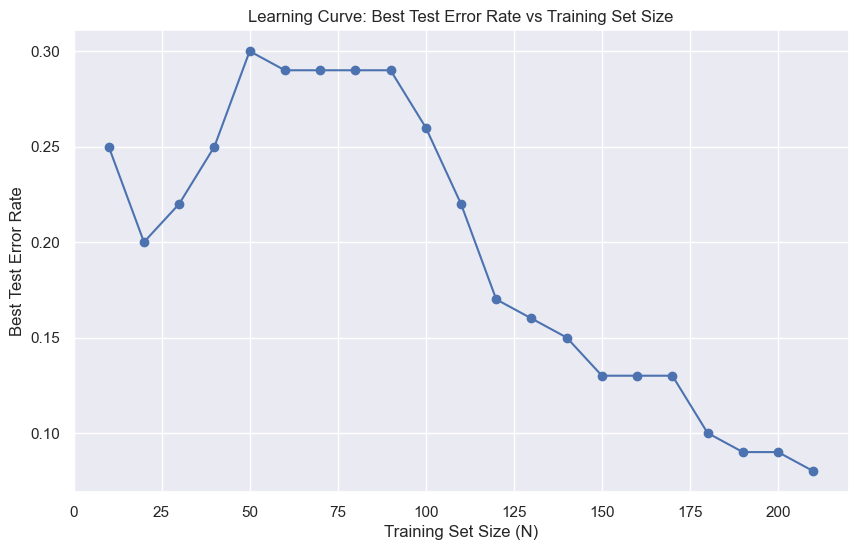

In [23]:
best_test_errors = []  # best test errors for each training size
optimal_k_values = {}

# Function to get best test error for a given training set size
def get_best_test_error(N):
    n_class_0 = N // 3
    n_class_1 = N - n_class_0

    subset_class_0 = class0.iloc[:n_class_0]
    subset_class_1 = class1.iloc[:n_class_1]
    subset_train = pd.concat([subset_class_0, subset_class_1])
    
    X_train_subset = subset_train.drop(columns=['class'])
    y_train_subset = subset_train['class']
    
    k_values = range(1, N, 5)
    best_error = float('inf')
    best_k = 1
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train_subset, y_train_subset)
        y_pred = knn.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        if error < best_error:
            best_error = error
            best_k = k
    
    best_test_errors.append(best_error)
    optimal_k_values[N] = best_k
    return best_error

# Generate learning curve
N_values = range(10, 211, 10)
best_errors = [get_best_test_error(N) for N in N_values]

table = [(N, optimal_k_values[N], best_test_errors[i]) for i, N in enumerate(N_values)]
print(tabulate(table, headers=["Training Size (N)", "Optimal k", "Best Test Error"], tablefmt="fancy_grid"))

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(N_values, best_errors, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve: Best Test Error Rate vs Training Set Size')
plt.grid(True)
plt.show()


## (d) Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1,6,11,...,196}.


### (d) i. Minkowski Distance: (A) which becomes Manhattan Distance with p = 1.

In [26]:
k_values = list(range(1, 197, 5))
test_errors = []
best_test_error_manhattan = float('inf')
best_k_manhattan = None

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_errors.append(test_error)
    if test_error < best_test_error_manhattan and k!=1:
        best_test_error_manhattan = test_error
        best_k_manhattan = k

print("Manhattan Distance (Minkowski with p=1):")
print(f"Best k: {best_k_manhattan}")
print(f"Test Error: {best_test_error_manhattan:.4f}")
print('Ignoring k=1 for optimal k value, beacuse it leads to overfitting.')

table = [[k, f"{error:.4f}"]for k, error  in zip(k_values, test_errors)]
print(tabulate(table, headers=["K Value", "Test Error"], tablefmt="fancy_grid"))

Manhattan Distance (Minkowski with p=1):
Best k: 6
Test Error: 0.1100
Ignoring k=1 for optimal k value, beacuse it leads to overfitting.
╒═══════════╤══════════════╕
│   K Value │   Test Error │
╞═══════════╪══════════════╡
│         1 │         0.11 │
├───────────┼──────────────┤
│         6 │         0.11 │
├───────────┼──────────────┤
│        11 │         0.11 │
├───────────┼──────────────┤
│        16 │         0.12 │
├───────────┼──────────────┤
│        21 │         0.12 │
├───────────┼──────────────┤
│        26 │         0.11 │
├───────────┼──────────────┤
│        31 │         0.12 │
├───────────┼──────────────┤
│        36 │         0.13 │
├───────────┼──────────────┤
│        41 │         0.13 │
├───────────┼──────────────┤
│        46 │         0.13 │
├───────────┼──────────────┤
│        51 │         0.14 │
├───────────┼──────────────┤
│        56 │         0.13 │
├───────────┼──────────────┤
│        61 │         0.15 │
├───────────┼──────────────┤
│        66 │         

### (d) i. (B) with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [28]:
best_k_minkowski = best_k_manhattan  
log_p_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
results = []
best_log_p = None
best_test_error_minkowski = float('inf')

for log_p in log_p_values:
    p = 10 ** log_p
    knn = KNeighborsClassifier(n_neighbors=best_k_minkowski, metric='minkowski', p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    if error < best_test_error_minkowski:
        best_test_error_minkowski = error
        best_log_p = log_p
    results.append([log_p, p, error])

print(f"\nBest log10(p): {best_log_p}")
print(f"Best test error: {best_test_error_minkowski:.4f}")

headers = ["log10(p)", "p", "Test Error"]
table = tabulate(results, headers=headers, tablefmt="fancy_grid")
print("\nTest Errors for different p values:")
print(table)


Best log10(p): 0.6
Best test error: 0.0600

Test Errors for different p values:
╒════════════╤══════════╤══════════════╕
│   log10(p) │        p │   Test Error │
╞════════════╪══════════╪══════════════╡
│        0.1 │  1.25893 │         0.09 │
├────────────┼──────────┼──────────────┤
│        0.2 │  1.58489 │         0.09 │
├────────────┼──────────┼──────────────┤
│        0.3 │  1.99526 │         0.08 │
├────────────┼──────────┼──────────────┤
│        0.4 │  2.51189 │         0.08 │
├────────────┼──────────┼──────────────┤
│        0.5 │  3.16228 │         0.08 │
├────────────┼──────────┼──────────────┤
│        0.6 │  3.98107 │         0.06 │
├────────────┼──────────┼──────────────┤
│        0.7 │  5.01187 │         0.07 │
├────────────┼──────────┼──────────────┤
│        0.8 │  6.30957 │         0.08 │
├────────────┼──────────┼──────────────┤
│        0.9 │  7.94328 │         0.09 │
├────────────┼──────────┼──────────────┤
│        1   │ 10       │         0.09 │
╘════════════╧═══

### (d) i. (C)which becomes Chebyshev Distance with p → ∞

In [30]:
k_values = list(range(1, 197, 5))
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(error)

best_k_chebyshev = k_values[np.argmin(test_errors)]
best_test_error_chebyshev = min(test_errors)

chebyshev_results = list(zip(k_values, test_errors))
table = tabulate(chebyshev_results, headers=['k', 'Test Error'], tablefmt='fancy_grid')

print("Chebyshev Distance (Minkowski with p → ∞):")
print(f"\nBest k: {best_k_chebyshev}")
print(f"Lowest Test Error: {best_test_error_chebyshev:.4f}")
print(table)

Chebyshev Distance (Minkowski with p → ∞):

Best k: 16
Lowest Test Error: 0.0800
╒═════╤══════════════╕
│   k │   Test Error │
╞═════╪══════════════╡
│   1 │         0.13 │
├─────┼──────────────┤
│   6 │         0.1  │
├─────┼──────────────┤
│  11 │         0.12 │
├─────┼──────────────┤
│  16 │         0.08 │
├─────┼──────────────┤
│  21 │         0.11 │
├─────┼──────────────┤
│  26 │         0.12 │
├─────┼──────────────┤
│  31 │         0.12 │
├─────┼──────────────┤
│  36 │         0.1  │
├─────┼──────────────┤
│  41 │         0.13 │
├─────┼──────────────┤
│  46 │         0.12 │
├─────┼──────────────┤
│  51 │         0.12 │
├─────┼──────────────┤
│  56 │         0.12 │
├─────┼──────────────┤
│  61 │         0.14 │
├─────┼──────────────┤
│  66 │         0.13 │
├─────┼──────────────┤
│  71 │         0.14 │
├─────┼──────────────┤
│  76 │         0.11 │
├─────┼──────────────┤
│  81 │         0.14 │
├─────┼──────────────┤
│  86 │         0.12 │
├─────┼──────────────┤
│  91 │         0.15 │

### (d) ii. Mahalanobis Distance.

In [32]:
def KNN(k_array, X_train, y_train, X_test, y_test, metric='mahalanobis'):
    
    results = []  
    best_error = float('inf')
    best_k = None
    cov_matrix = np.cov(X_train.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    for k in k_array:
        knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
        knn.fit(X_train, y_train)
        y_test_pred_mahalanobis = knn.predict(X_test)
        y_train_pred_mahalanobis = knn.predict(X_train) 
        
        train_error = 1 - accuracy_score(y_train, y_train_pred_mahalanobis)
        test_error = 1 - accuracy_score(y_test, y_test_pred_mahalanobis)
        results.append([k, test_error])      
        
        if test_error < best_error and k!=1:
            best_error = test_error
            best_k = k
    
    return results, best_k, best_error

k_array = np.arange(1, 197, 5)
results, best_k_mahalanobis, best_test_error_mahalanobis = KNN(k_array, X_train, y_train, X_test, y_test, metric='mahalanobis')

print("\nBest k and Best Test Error for Mahalanobis Distance:")
print(f"\nBest k: {best_k_mahalanobis}")
print(f"Lowest Test Error: {best_test_error_mahalanobis:.4f}")

print("\nAll k values and their Test Errors for Mahalanobis Distance:")
print(tabulate(results, headers=['k', 'Test Error'], tablefmt='fancy_grid'))



Best k and Best Test Error for Mahalanobis Distance:

Best k: 6
Lowest Test Error: 0.1600

All k values and their Test Errors for Mahalanobis Distance:
╒═════╤══════════════╕
│   k │   Test Error │
╞═════╪══════════════╡
│   1 │         0.14 │
├─────┼──────────────┤
│   6 │         0.16 │
├─────┼──────────────┤
│  11 │         0.18 │
├─────┼──────────────┤
│  16 │         0.17 │
├─────┼──────────────┤
│  21 │         0.18 │
├─────┼──────────────┤
│  26 │         0.18 │
├─────┼──────────────┤
│  31 │         0.2  │
├─────┼──────────────┤
│  36 │         0.2  │
├─────┼──────────────┤
│  41 │         0.2  │
├─────┼──────────────┤
│  46 │         0.17 │
├─────┼──────────────┤
│  51 │         0.21 │
├─────┼──────────────┤
│  56 │         0.19 │
├─────┼──────────────┤
│  61 │         0.22 │
├─────┼──────────────┤
│  66 │         0.21 │
├─────┼──────────────┤
│  71 │         0.23 │
├─────┼──────────────┤
│  76 │         0.24 │
├─────┼──────────────┤
│  81 │         0.23 │
├─────┼────────────

## Summarizing test errors for different metrics

In [34]:
data = []
data.append(['Euclidean', best_k_euclidean, best_test_error_euclidean])
data.append(['Manhattan', best_k_manhattan, best_test_error_manhattan])
data.append([f'Minkowski\n(log10p value {best_log_p})', best_k_minkowski, best_test_error_minkowski])
data.append(['Chebyshev', best_k_chebyshev, best_test_error_chebyshev])
data.append(['Mahalanobis', best_k_mahalanobis, best_test_error_mahalanobis])
print(tabulate(data, headers=['Metric', 'K', 'Error Rate'], tablefmt='fancy_grid'))

╒════════════════════╤═════╤══════════════╕
│ Metric             │   K │   Error Rate │
╞════════════════════╪═════╪══════════════╡
│ Euclidean          │   4 │         0.06 │
├────────────────────┼─────┼──────────────┤
│ Manhattan          │   6 │         0.11 │
├────────────────────┼─────┼──────────────┤
│ Minkowski          │   6 │         0.06 │
│ (log10p value 0.6) │     │              │
├────────────────────┼─────┼──────────────┤
│ Chebyshev          │  16 │         0.08 │
├────────────────────┼─────┼──────────────┤
│ Mahalanobis        │   6 │         0.16 │
╘════════════════════╧═════╧══════════════╛


## (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

In [36]:
k_values = list(range(1, 197, 5))

metrics = ['euclidean', 'manhattan', 'chebyshev']

results = []

for metric in metrics:
    best_error = float('inf')
    best_k = None
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        
        if error < best_error:
            best_error = error
            best_k = k
    
    results.append([metric, best_k, best_error])

table = tabulate(results, headers=['Metric', 'Best k', 'Best Test Error'], tablefmt='fancy_grid')
print("Best Test Errors for Weighted Voting KNN:")
print(table)

Best Test Errors for Weighted Voting KNN:
╒═══════════╤══════════╤═══════════════════╕
│ Metric    │   Best k │   Best Test Error │
╞═══════════╪══════════╪═══════════════════╡
│ euclidean │        6 │              0.1  │
├───────────┼──────────┼───────────────────┤
│ manhattan │       26 │              0.1  │
├───────────┼──────────┼───────────────────┤
│ chebyshev │       16 │              0.11 │
╘═══════════╧══════════╧═══════════════════╛


## (f) What is the lowest training error rate you achieved?
### Lowest training error achieved in this homework is 0.0 when k=1.